#### Shikhar_Mahajan_0801CS171077_ Data_Science_Project_1

# Title : Predict Player Rating

### Preamble:

The european soccer dataset is a SQL database which has 7 tables namely,

tables = { Country , League , Match , Player , Player_Attributes , Team , Team_Attributes}
        
In this project we are using Player_Attributes to predict overall rating of a soccer player by his given observed attributes.
        
In Player_attribute table we have player details and characteristics about how he plays for example, his defensive skills, and sliding tackling etc.
We also have a column having the overall rating of player on the basis of these features and characteristics.

Using these player features and overall rating , here we will design a supervised model to get a player's overall rating.

### Data Understanding

Data Source : Kaggle

Data Name: European soccer dataset

Data url : https://www.kaggle.com/hugomathien/soccer
                
Attributes : Their are total 42 attributes namely,

       'id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'
       
3 of 42 are id which are of no use and 3 fields [preferred_foot,attacking_work_rate,defensive_work_rate] are of object type. So total 6 fields are dropped.

### code for data understanding

Import all needed modules

In [1]:
import sqlite3
import pandas as pd 
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import seaborn as sns
import matplotlib.pyplot as plt

Creating connection with database.

In [2]:
cnx = sqlite3.connect('database.sqlite')
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

In [3]:
#DATA
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [4]:
#Data Shape
print(df.shape)

(183978, 42)


In [5]:
print("ROWS : ", df.shape[0])
print("COLUMNS : ",df.shape[1])

ROWS :  183978
COLUMNS :  42


In [6]:
print("No. of columnns:: ",len(df.columns))
print()
print("Column names:: ",df.columns)

No. of columnns::  42

Column names::  Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

By above function we can see the datatypes of the attributes and the total memory used by the dataset.
we will remove id(int) and object dtype field for our model to get numerical values.

In [8]:
print("memory usage: 59.0+ MB ")

memory usage: 59.0+ MB 


In [9]:
df.describe()

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183978.00000,183978.000000,183978.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,...,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
mean,91989.50000,165671.524291,135900.617324,68.600015,73.460353,55.086883,49.921078,57.266023,62.429672,49.468436,...,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
std,53110.01825,53851.094769,136927.840510,7.041139,6.592271,17.242135,19.038705,16.488905,14.194068,18.256618,...,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155
min,1.00000,2.000000,2625.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,45995.25000,155798.000000,34763.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,91989.50000,183488.000000,77741.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,137983.75000,199848.000000,191080.000000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,183978.00000,234141.000000,750584.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,...,97.000000,96.000000,96.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


## Data Prepration:

In [10]:
#checking null value
df.isnull().any()

id                     False
player_fifa_api_id     False
player_api_id          False
date                   False
overall_rating          True
potential               True
preferred_foot          True
attacking_work_rate     True
defensive_work_rate     True
crossing                True
finishing               True
heading_accuracy        True
short_passing           True
volleys                 True
dribbling               True
curve                   True
free_kick_accuracy      True
long_passing            True
ball_control            True
acceleration            True
sprint_speed            True
agility                 True
reactions               True
balance                 True
shot_power              True
jumping                 True
stamina                 True
strength                True
long_shots              True
aggression              True
interceptions           True
positioning             True
vision                  True
penalties               True
marking       

In [11]:
#total null values per column
df.isnull().sum()

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [12]:
#Total no. null values in the dataframe
df.isnull().sum().sum()

47301

In [13]:
#Total rows having null values

prev=df.shape[0]
present=df.dropna().shape[0]
diff=prev-present
print("Total rows having null vales: ",diff)
print()

Total rows having null vales:  3624



In [14]:
df=df.drop(['preferred_foot','attacking_work_rate','defensive_work_rate','date','id','player_fifa_api_id','player_api_id'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 35 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   overall_rating      183142 non-null  float64
 1   potential           183142 non-null  float64
 2   crossing            183142 non-null  float64
 3   finishing           183142 non-null  float64
 4   heading_accuracy    183142 non-null  float64
 5   short_passing       183142 non-null  float64
 6   volleys             181265 non-null  float64
 7   dribbling           183142 non-null  float64
 8   curve               181265 non-null  float64
 9   free_kick_accuracy  183142 non-null  float64
 10  long_passing        183142 non-null  float64
 11  ball_control        183142 non-null  float64
 12  acceleration        183142 non-null  float64
 13  sprint_speed        183142 non-null  float64
 14  agility             181265 non-null  float64
 15  reactions           183142 non-nul

### making two different data frame : 1> by replacing na by mean 2> by dropping na


In [15]:
#Replacing null value with the mean value.
dfwithmean=df.fillna(df.mean())

#droping Null values since no. of dropping rows is very less compared to available rows.
df=df.dropna()

Taking Usefull features, 
Dropping ids with datatype int and fields with object data type

#### features to be taken into cosideration

In [16]:
features = [
       'potential', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes']

In [17]:
#these are the first 5 value counts to see the frequency distribution of each column
flist=[]
for i in features:
    flist.append((i,df[i].value_counts().nlargest(5)))
#print(flist)

#looking through the output, values are quite continious and not biased for a value.

Target Value

In [18]:
target = ['overall_rating']

In [19]:
Xlabel=df[features]
Ylabel=df[target]

In [20]:
Xlabel.head()

,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,66.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


### visualizing correlation of attributes using heatmap

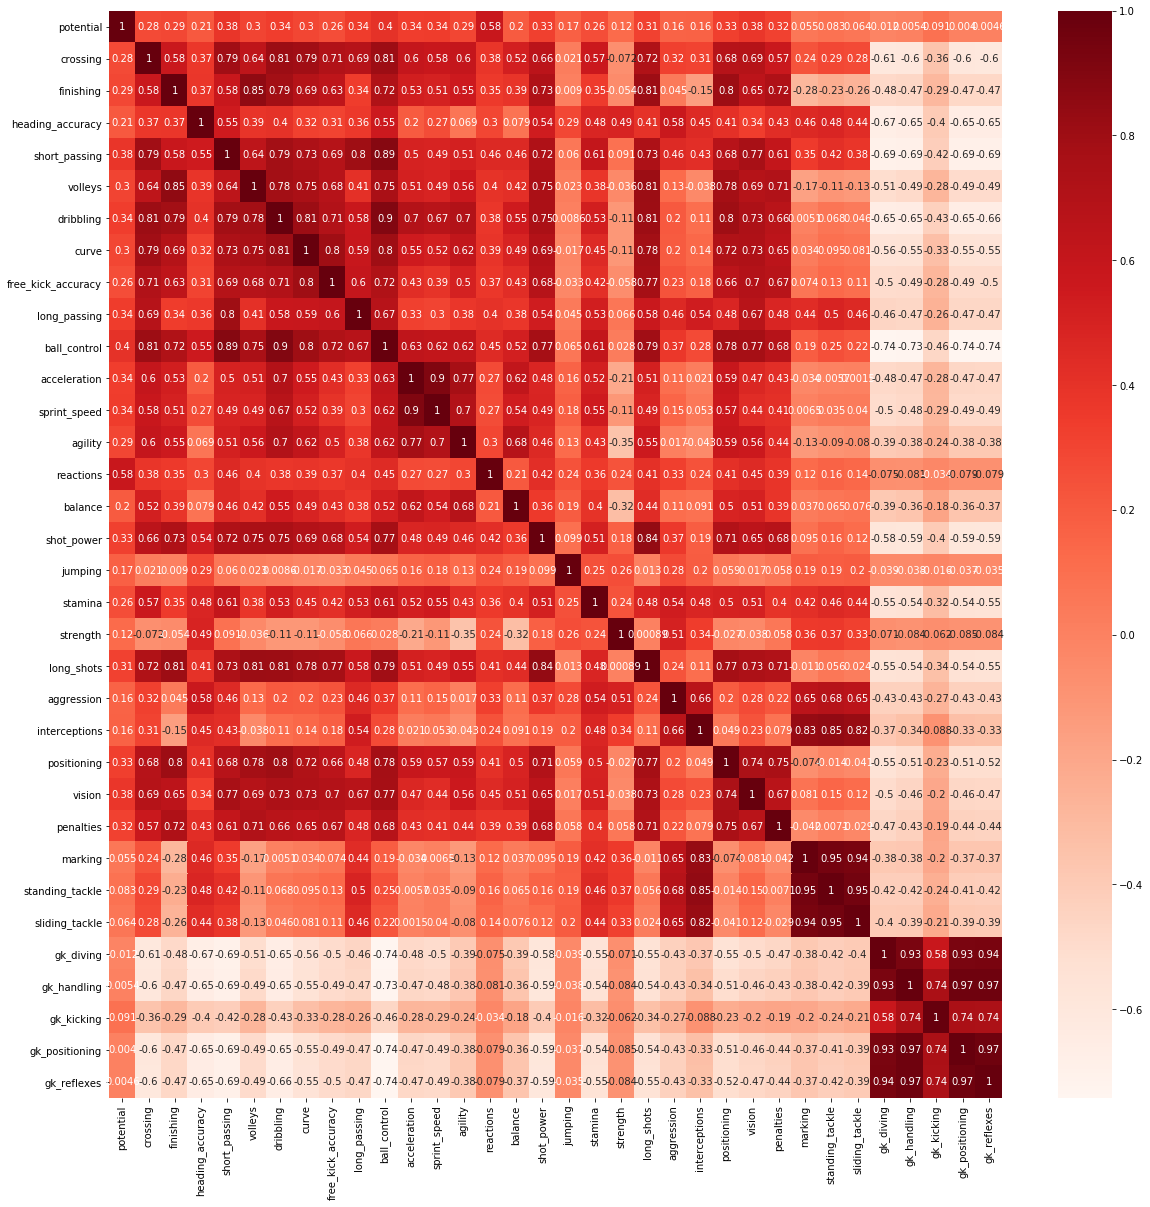

In [21]:
plt.figure(figsize=(20,20))
sns.heatmap(Xlabel.corr(), cmap='Reds', annot=True)

### Data

In [22]:
Xlabel.describe()

,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,181265.000000,181265.000000,181265.000000,181265.000000,181265.000000,181265.000000,181265.000000,181265.000000,181265.000000,181265.000000,...,181265.000000,181265.000000,181265.000000,181265.000000,181265.000000,181265.000000,181265.000000,181265.000000,181265.000000,181265.000000
mean,73.471646,55.119036,49.939095,57.253871,62.459885,49.468436,59.230861,52.965675,49.380327,57.074620,...,57.873550,54.935950,46.742576,50.335426,48.001462,14.713629,15.980631,20.629581,16.049083,16.360202
std,6.581667,17.251884,19.047599,16.485767,14.186580,18.256618,17.749955,18.255788,17.824868,14.409878,...,15.144086,15.558855,21.231011,21.497298,21.598778,16.864168,15.865238,21.213838,16.097249,17.204948
min,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,2.000000,1.000000,3.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,52.000000,41.000000,36.000000,49.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,64.000000,56.000000,50.000000,59.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,72.000000,67.000000,63.000000,67.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,97.000000,94.000000,97.000000,97.000000,...,97.000000,96.000000,94.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


In [23]:
Xlabel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181265 entries, 0 to 183977
Data columns (total 34 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   potential           181265 non-null  float64
 1   crossing            181265 non-null  float64
 2   finishing           181265 non-null  float64
 3   heading_accuracy    181265 non-null  float64
 4   short_passing       181265 non-null  float64
 5   volleys             181265 non-null  float64
 6   dribbling           181265 non-null  float64
 7   curve               181265 non-null  float64
 8   free_kick_accuracy  181265 non-null  float64
 9   long_passing        181265 non-null  float64
 10  ball_control        181265 non-null  float64
 11  acceleration        181265 non-null  float64
 12  sprint_speed        181265 non-null  float64
 13  agility             181265 non-null  float64
 14  reactions           181265 non-null  float64
 15  balance             181265 non-nul

## Data Modelling

Splitting data into train and test

In [24]:
X_train, X_test, y_train, y_test = train_test_split(Xlabel, Ylabel, test_size=0.25, random_state=324)

### Using Linear regression Model

In [25]:
#normalize equals false
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
y_prediction = model.predict(X_test)
print(y_prediction)

[[73.73372437]
 [68.96342763]
 [67.16378113]
 ...
 [72.66000365]
 [62.49688244]
 [65.19774705]]


In [27]:
model.coef_

array([[ 0.37946221,  0.02238471,  0.01165731,  0.06900136,  0.05028629,
         0.004506  , -0.0124083 ,  0.01121986,  0.01257058,  0.00685147,
         0.1353039 ,  0.00539411,  0.00962985, -0.00979713,  0.20968919,
         0.00857654,  0.01673921,  0.0157669 , -0.00561322,  0.06135366,
        -0.01311126,  0.02048515,  0.01227937, -0.01066104, -0.00190183,
         0.01334852,  0.03293117,  0.00280212, -0.02813735,  0.16327732,
         0.03190479, -0.03311259,  0.0555135 ,  0.02472801]])

In [28]:
model.intercept_

array([-3.55365958])

In [29]:
#predicting values on test data
y_test.describe()

,overall_rating
count,45317.000000
mean,68.573758
std,7.035731
min,35.000000
25%,64.000000
50%,69.000000
75%,73.000000
max,94.000000


Root mean square error

In [30]:
RMSE_linear = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))
print(RMSE_linear)

2.7964235845338963


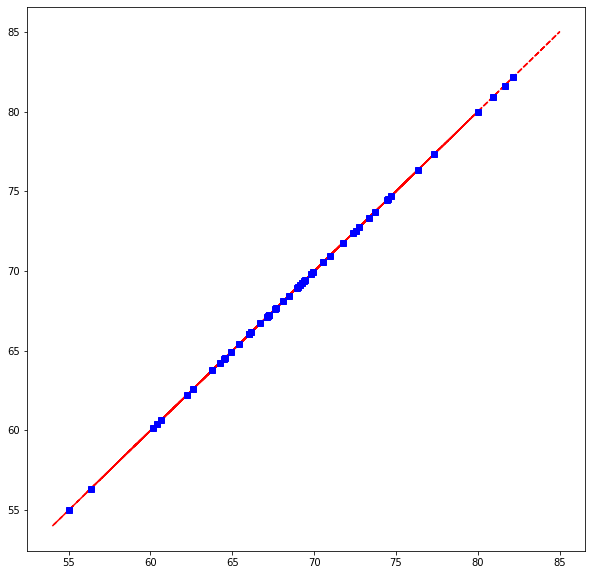

In [31]:
# sns.lineplot(data=y_test)
# plt.plot(y_test,figsize=(20,20))

plt.figure(figsize=(10,10))
plt.plot(y_test[:50], y_test[:50], 'r--', y_prediction[:50], y_prediction[:50], 'bs')
plt.show()

###  parameter Tunning : performing Nomalization

In [32]:
#normalize equals True
model2 = LinearRegression(normalize=True)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
RMSE2 = sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred2))
print("RMSE WITH NORMALIZATION: ",RMSE2)

RMSE WITH NORMALIZATION:  2.796423584533895


Here we can clearly see that there is no difference after tunning the normalizing parameter.

From here we can inferf that since our data is quite continious and properly scaled/scattered their is no need and effect of normalization.

### Another Regression model : DECISION TREE REGRESSOR

In [33]:
#depth 30 is decided by error and run method
reg_withdf = DecisionTreeRegressor(max_depth=30)
reg_withdf.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=30,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [34]:
y_pred = reg_withdf.predict(X_test)
y_pred

array([72., 69., 68., ..., 76., 64., 62.])

In [35]:
RMSE_dtr = sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred))

In [36]:
print("RMSE : ", RMSE_dtr)

RMSE :  1.3776800319818416


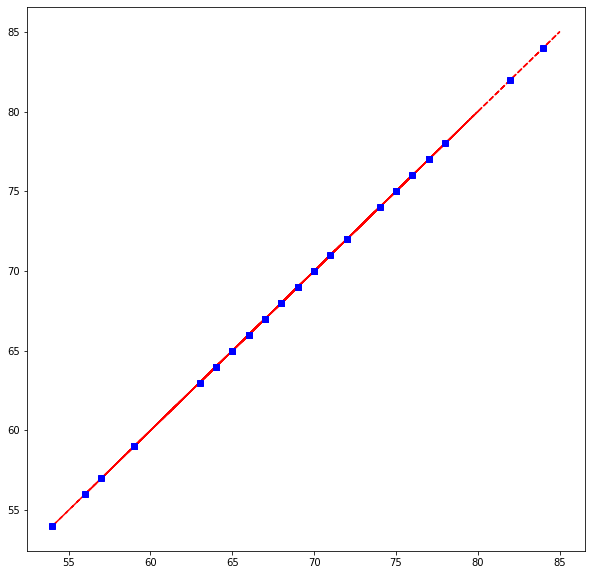

In [37]:
plt.figure(figsize=(10,10))
plt.plot(y_test[:50], y_test[:50], 'r--', y_pred[:50], y_pred[:50], 'bs')
plt.show()

### If we use dfwithmean that is dataframe which have filled na values with mean of the column , then their is no significant difference in result

In [38]:
Xlabel1=dfwithmean[features]
Ylabel1=dfwithmean[target]
X_train1, X_test1, y_train1, y_test1 = train_test_split(Xlabel1, Ylabel1, test_size=0.25, random_state=32)

In [39]:
reg_withdfmean = DecisionTreeRegressor(max_depth=30)
reg_withdfmean.fit(X_train1, y_train1)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=30,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [40]:
y_pred1 = reg_withdfmean.predict(X_test1)
RMSE_dtr2 = sqrt(mean_squared_error(y_true = y_test1, y_pred = y_pred1))
RMSE_dtr2

1.3993294744152924

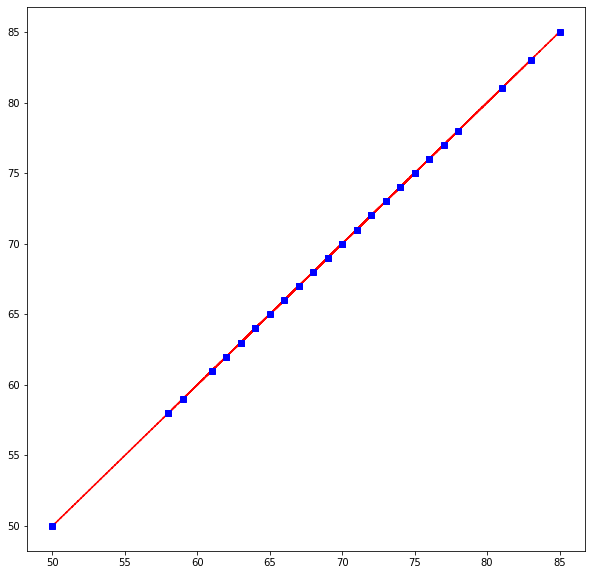

In [41]:
plt.figure(figsize=(10,10))
plt.plot(y_test1[:50], y_test1[:50], 'r--', y_pred1[:50], y_pred1[:50], 'bs')
plt.show()

## Evaluation and analysis metrices

Evaluation of regression model is done by root mean square error value metirce.
Here, 2 different models are used to obtain best results such as linear regression and decision tree regressor.

Root mean square value obtained by 

    linear regreesion = 2.8019060390678523
    
    Decision tree regressor = 1.374632609482695

We can observe that decision tree gives us best result with less error.

## Use of project

This model can be used to know overall rating of a player provided with the given attributes.

By ranking player , an individual player can know where he stand among different players, who are the competitors for him and from whom he can learn to progress or improve his skills more.

The ranking gives a player a motivation to learn more and achieve more and also gives the excitement for being a top soccer player of the world. 

Player ranking also provides team to make strategies to compete against another team and train or choose players accordingly to deal with competitive teams.